# Real-world Data Wrangling - (Air Quality Data in India (2015 - 2020))

## 1. Gather data

In this section, you will extract data using two different data gathering methods and combine the data. Use at least two different types of data-gathering methods.

### **1.1.** Problem Statement
For this project, I will analyze how air pollution levels vary across different monitoring stations in Indian cities. Specifically, I aim to investigate the temporal trends of pollutants like PM2.5 and PM10 and their spatial distribution. I will wrangle the station_day.csv dataset, which contains daily pollution data, and optionally use stations.csv to link pollution levels to specific station locations for deeper insights. This will involve addressing missing data, handling outliers, and ensuring the datasets are tidy for analysis.

### **1.2.** Gather at least two datasets using two different data gathering methods

List of data gathering methods:

- Download data manually
- Programmatically downloading files
- Gather data by accessing APIs
- Gather and extract data from HTML files using BeautifulSoup
- Extract data from a SQL database

Each dataset must have at least two variables, and have greater than 500 data samples within each dataset.

For each dataset, briefly describe why you picked the dataset and the gathering method (2-3 full sentences), including the names and significance of the variables in the dataset. Show your work (e.g., if using an API to download the data, please include a snippet of your code). 

Load the dataset programmtically into this notebook.

#### **Dataset 1**

Type:(CSV File.)

Method:(The data was gatherd using API from kaggle website)

Dataset variables:

StationId: Unique identifier for each air quality monitoring station.

Date: The date on which air quality measurements were recorded.

PM2.5: Concentration of fine particulate matter (particles smaller than 2.5 micrometers).

PM10: Concentration of coarse particulate matter (particles smaller than 10 micrometers).

NO: Concentration of nitric oxide in the air.

NO2: Concentration of nitrogen dioxide in the air.

NOx: Total concentration of nitrogen oxides (includes both NO and NO2).

NH3: Concentration of ammonia in the air.

CO: Concentration of carbon monoxide in the air.

SO2: Concentration of sulfur dioxide in the air.

O3: Concentration of ozone in the air.

Benzene: Concentration of benzene, a volatile organic compound.

Toluene: Concentration of toluene, another volatile organic compound.

Xylene: Concentration of xylene, a volatile organic compound.

AQI: Air Quality Index, summarizing the overall air quality based on pollutant concentrations.

AQI_Bucket: Category of air quality based on AQI (e.g., "Good," "Moderate," "Poor").


In [5]:
import pandas as pd  # for handling data in tabular form
import numpy as np   # for numerical operations
import kaggle        # for downloading datasets from Kaggle
import os            # for interacting with the file system
import matplotlib.pyplot as plt  # for plotting graphs
import seaborn as sns


In [7]:
from kaggle.api.kaggle_api_extended import KaggleApi
import zipfile
import os

# Initialize and authenticate Kaggle API
api = KaggleApi()
api.authenticate()

# Define paths
dataset_path = "rohanrao/air-quality-data-in-india"
file_name = "station_day.csv"
data_folder = "data-sets"
os.makedirs(data_folder, exist_ok=True)

# Download the file (compressed)
api.dataset_download_file(dataset_path, file_name=file_name, path=data_folder)

# Extract the file if it's compressed
zip_file_path = os.path.join(data_folder, f"{file_name}.zip")
if os.path.exists(zip_file_path):
    with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
        zip_ref.extractall(data_folder)
    os.remove(zip_file_path)  # Optional: delete the zip file
    print(f"Extracted {file_name} to {data_folder}")
else:
    print(f"{file_name} downloaded directly.")

station_day_df= pd.read_csv("data-sets/station_day.csv")


Dataset URL: https://www.kaggle.com/datasets/rohanrao/air-quality-data-in-india
Extracted station_day.csv to data-sets


#### **Dataset 2**

Type:(CSV File.)

Method:(Download it manually from kaggle website)

Dataset variables:

StationId: Unique identifier for each air quality monitoring station.

Station Name: Name of the monitoring station.

City: The city where the monitoring station is located.

State: The state in which the station is located.

Location: Specific location details of the station (e.g., neighborhood or street).

Latitude: Geographical latitude of the station.

Longitude: Geographical longitude of the station.



In [8]:
# readd the stations df
stations_df= pd.read_csv("data-sets/stations.csv")


### Quality Issue 1: Missing Values in both datasets

In [9]:
# Display the first 5 rows of the station_day_df dataset to visually inspect the data
station_day_df.head()

,StationId,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,AP001,2017-11-24,71.36,115.75,1.75,20.65,12.40,12.19,0.10,10.76,109.26,0.17,5.92,0.10,NaN,NaN
1,AP001,2017-11-25,81.40,124.50,1.44,20.50,12.08,10.72,0.12,15.24,127.09,0.20,6.50,0.06,184.0,Moderate
2,AP001,2017-11-26,78.32,129.06,1.26,26.00,14.85,10.28,0.14,26.96,117.44,0.22,7.95,0.08,197.0,Moderate
3,AP001,2017-11-27,88.76,135.32,6.60,30.85,21.77,12.91,0.11,33.59,111.81,0.29,7.63,0.12,198.0,Moderate
4,AP001,2017-11-28,64.18,104.09,2.56,28.07,17.01,11.42,0.09,19.00,138.18,0.17,5.02,0.07,188.0,Moderate


In [10]:
# Display the first 5 rows of the stations_df dataset to visually inspect the data
stations_df.head()

,StationId,StationName,City,State,Status
0,AP001,"Secretariat, Amaravati - APPCB",Amaravati,Andhra Pradesh,Active
1,AP002,"Anand Kala Kshetram, Rajamahendravaram - APPCB",Rajamahendravaram,Andhra Pradesh,NaN
2,AP003,"Tirumala, Tirupati - APPCB",Tirupati,Andhra Pradesh,NaN
3,AP004,"PWD Grounds, Vijayawada - APPCB",Vijayawada,Andhra Pradesh,NaN
4,AP005,"GVM Corporation, Visakhapatnam - APPCB",Visakhapatnam,Andhra Pradesh,Active


In [11]:
# Get detailed information about the station_day_df dataset, including data types and non-null counts
station_day_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108035 entries, 0 to 108034
Data columns (total 16 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   StationId   108035 non-null  object 
 1   Date        108035 non-null  object 
 2   PM2.5       86410 non-null   float64
 3   PM10        65329 non-null   float64
 4   NO          90929 non-null   float64
 5   NO2         91488 non-null   float64
 6   NOx         92535 non-null   float64
 7   NH3         59930 non-null   float64
 8   CO          95037 non-null   float64
 9   SO2         82831 non-null   float64
 10  O3          82467 non-null   float64
 11  Benzene     76580 non-null   float64
 12  Toluene     69333 non-null   float64
 13  Xylene      22898 non-null   float64
 14  AQI         87025 non-null   float64
 15  AQI_Bucket  87025 non-null   object 
dtypes: float64(13), object(3)
memory usage: 13.2+ MB


In [12]:
# Get detailed information about the stations_df dataset, including data types and non-null counts
stations_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 230 entries, 0 to 229
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   StationId    230 non-null    object
 1   StationName  230 non-null    object
 2   City         230 non-null    object
 3   State        230 non-null    object
 4   Status       133 non-null    object
dtypes: object(5)
memory usage: 9.1+ KB


Justification:

both datasets contains missing values

in the first dataset the (PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket) have missing values

in the econde dataset the (Status) have missing values


### Quality Issue 2: Wrong data type

In [13]:
# station_day dataset:
station_day_df.dtypes


StationId      object
Date           object
PM2.5         float64
PM10          float64
NO            float64
NO2           float64
NOx           float64
NH3           float64
CO            float64
SO2           float64
O3            float64
Benzene       float64
Toluene       float64
Xylene        float64
AQI           float64
AQI_Bucket     object
dtype: object

In [14]:
# Display the unique categories within the 'AQI_Bucket' column
station_day_df['AQI_Bucket'].unique()

array([nan, 'Moderate', 'Poor', 'Very Poor', 'Satisfactory', 'Good',
       'Severe'], dtype=object)

In [15]:
# stations dataset:
stations_df.dtypes


StationId      object
StationName    object
City           object
State          object
Status         object
dtype: object

In [16]:
# Display the unique categories within the 'Status' column
stations_df['Status'].unique()

array(['Active', nan, 'Inactive'], dtype=object)

In [17]:
stations_df['Status'].value_counts()

Status
Active      131
Inactive      2
Name: count, dtype: int64

### Justification:

in the station_day_df:

Date should be datetime64, but it's currently object.

AQI_Bucket should be category, but it's currently object.

in the stations_df:

Status should be category, but it's currently object.




### Tidiness Issue 1:

#### in the firest dataset (station_day_df)

In [18]:
# in station_day_df
#the dataset has multiple pollutant columns:
pollutants = ['PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2', 'O3', 'Benzene', 'Toluene', 'Xylene']
station_day_df[pollutants].head()

,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene
0,71.36,115.75,1.75,20.65,12.40,12.19,0.10,10.76,109.26,0.17,5.92,0.10
1,81.40,124.50,1.44,20.50,12.08,10.72,0.12,15.24,127.09,0.20,6.50,0.06
2,78.32,129.06,1.26,26.00,14.85,10.28,0.14,26.96,117.44,0.22,7.95,0.08
3,88.76,135.32,6.60,30.85,21.77,12.91,0.11,33.59,111.81,0.29,7.63,0.12
4,64.18,104.09,2.56,28.07,17.01,11.42,0.09,19.00,138.18,0.17,5.02,0.07


#### in the seconde dataset (stations_df)

In [19]:
# Inspect the 'StationName' column to check if it contains multiple variables
stations_df['StationName'].head()

0                    Secretariat, Amaravati - APPCB
1    Anand Kala Kshetram, Rajamahendravaram - APPCB
2                        Tirumala, Tirupati - APPCB
3                   PWD Grounds, Vijayawada - APPCB
4            GVM Corporation, Visakhapatnam - APPCB
Name: StationName, dtype: object

### Justification

in station_day_df:

The dataset has multiple columns representing different air pollutants 
( PM2.5, PM10, NO, NO2, NOx, NH3, CO, SO2, O3, Benzene, Toluene, Xylene). Each of these pollutants is represented in its own column.


in stations_df:

A preview of the StationName column to show if it contains multiple pieces of information.


### Tidiness Issue 2:

#### in the firest dataset (station_day_df)


In [20]:
# in station_day_df
#Show the relationship between AQI and AQI_Bucket..
#Problem: These columns represent the same underlying information about air quality, where the AQI value can be used to derive the AQI_Bucket or vice versa. Keeping both columns separately can lead to redundancy and confusion.

station_day_df[['AQI', 'AQI_Bucket']].head()


,AQI,AQI_Bucket
0,NaN,NaN
1,184.0,Moderate
2,197.0,Moderate
3,198.0,Moderate
4,188.0,Moderate


#### in the seconde dataset (stations_df)

In [21]:
stations_df.isnull().sum()

StationId       0
StationName     0
City            0
State           0
Status         97
dtype: int64

In [22]:
stations_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 230 entries, 0 to 229
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   StationId    230 non-null    object
 1   StationName  230 non-null    object
 2   City         230 non-null    object
 3   State        230 non-null    object
 4   Status       133 non-null    object
dtypes: object(5)
memory usage: 9.1+ KB


### Justification

in station_day_df:

#The dataset includes both AQI (numeric) and AQI_Bucket (categorical) columns, where AQI_Bucket provides the air quality status (e.g., "Good", "Moderate", "Poor").

in stations_df:

The Status column contains a large number of missing values (NaN). As seen in the sample data, only some entries have an "Active" status, while others are missing. If Status is not important for your analysis, you might consider dropping it.


## 3. Clean data


In [23]:
# Create copies of the datasets to ensure the original data remains unchanged
cleaned_station_day_df = station_day_df.copy()
cleaned_stations_df = stations_df.copy()


### **Quality Issue 1:

In [24]:
# drop AQI_Bucket column 
cleaned_station_day_df.drop(['AQI_Bucket'], axis=1, inplace=True)

cleaned_station_day_df = cleaned_station_day_df.dropna()



In [25]:
cleaned_station_day_df.head()

,StationId,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI
1,AP001,2017-11-25,81.40,124.50,1.44,20.50,12.08,10.72,0.12,15.24,127.09,0.20,6.50,0.06,184.0
2,AP001,2017-11-26,78.32,129.06,1.26,26.00,14.85,10.28,0.14,26.96,117.44,0.22,7.95,0.08,197.0
3,AP001,2017-11-27,88.76,135.32,6.60,30.85,21.77,12.91,0.11,33.59,111.81,0.29,7.63,0.12,198.0
4,AP001,2017-11-28,64.18,104.09,2.56,28.07,17.01,11.42,0.09,19.00,138.18,0.17,5.02,0.07,188.0
5,AP001,2017-11-29,72.47,114.84,5.23,23.20,16.59,12.25,0.16,10.55,109.74,0.21,4.71,0.08,173.0


In [26]:
cleaned_station_day_df.shape

(10314, 15)

In [27]:
# Validate that there are no missing values in the cleaned_station_day_df
cleaned_station_day_df.isnull().sum()


StationId    0
Date         0
PM2.5        0
PM10         0
NO           0
NO2          0
NOx          0
NH3          0
CO           0
SO2          0
O3           0
Benzene      0
Toluene      0
Xylene       0
AQI          0
dtype: int64

In [28]:
#cleaned_stations_df

#drop the status column
cleaned_stations_df.drop(['Status'], axis=1, inplace=True)




In [29]:
cleaned_stations_df.head()

,StationId,StationName,City,State
0,AP001,"Secretariat, Amaravati - APPCB",Amaravati,Andhra Pradesh
1,AP002,"Anand Kala Kshetram, Rajamahendravaram - APPCB",Rajamahendravaram,Andhra Pradesh
2,AP003,"Tirumala, Tirupati - APPCB",Tirupati,Andhra Pradesh
3,AP004,"PWD Grounds, Vijayawada - APPCB",Vijayawada,Andhra Pradesh
4,AP005,"GVM Corporation, Visakhapatnam - APPCB",Visakhapatnam,Andhra Pradesh


In [30]:
# Validate that there are no missing values in the cleaned_stations_df
cleaned_stations_df.isnull().sum()


StationId      0
StationName    0
City           0
State          0
dtype: int64

##### Other issues The column causing this issue has been removed.

### **Quality Issue 2:

In [31]:
# Convert 'Date' to datetime64
cleaned_station_day_df['Date'] = pd.to_datetime(cleaned_station_day_df['Date'], errors='coerce')


In [32]:
# Validate that from Date column
cleaned_station_day_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10314 entries, 1 to 106147
Data columns (total 15 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   StationId  10314 non-null  object        
 1   Date       10314 non-null  datetime64[ns]
 2   PM2.5      10314 non-null  float64       
 3   PM10       10314 non-null  float64       
 4   NO         10314 non-null  float64       
 5   NO2        10314 non-null  float64       
 6   NOx        10314 non-null  float64       
 7   NH3        10314 non-null  float64       
 8   CO         10314 non-null  float64       
 9   SO2        10314 non-null  float64       
 10  O3         10314 non-null  float64       
 11  Benzene    10314 non-null  float64       
 12  Toluene    10314 non-null  float64       
 13  Xylene     10314 non-null  float64       
 14  AQI        10314 non-null  float64       
dtypes: datetime64[ns](1), float64(13), object(1)
memory usage: 1.3+ MB


In [33]:
cleaned_station_day_df['Date'].dtype

dtype('<M8[ns]')

##### Other issues The column causing this issue has been removed.

### **Tidiness Issue 1:

#### in the firest dataset (station_day_df)
Use pd.melt() to Reshape the Data:

Combine all the pollutant columns into two columns: Pollutant (pollutant name) and Value (its measurement).
Retain other identifying columns such as StationId and Date.


In [34]:
# Columns to keep (identifiers)
id_vars = ['StationId', 'Date']

# Columns to melt (pollutants)
value_vars = ['PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2', 'O3', 'Benzene', 'Toluene', 'Xylene']

# Melt the dataset
cleaned_station_day_df = pd.melt(
    cleaned_station_day_df,  # First argument is the dataset
    id_vars=id_vars,
    value_vars=value_vars,
    var_name='Pollutant',
    value_name='Value'
)

# Preview the result


In [35]:
# Preview the result
cleaned_station_day_df.sample(10)

,StationId,Date,Pollutant,Value
18423,TG004,2020-03-10,PM10,54.12
49683,TG006,2016-05-25,NOx,20.91
66943,TG001,2020-05-31,CO,0.33
104888,AP005,2020-06-02,Toluene,3.44
92418,WB009,2019-10-15,O3,45.72
37727,TG003,2019-11-26,NO2,27.23
83415,AP005,2017-04-04,O3,7.31
89727,TG004,2017-04-20,O3,40.75
59818,TG006,2015-10-21,NH3,11.18
35481,TG001,2018-11-12,NO2,16.49


#### in the second dataset (stations_df):
 StationName column it contains multiple pieces of information (e.g., names combined with locations or organizations), we can break the problem into two steps:


Step 1: Inspect the StationName Column


In [36]:
# Preview unique values in the StationName column
print(cleaned_stations_df['StationName'].unique())

# Analyze the structure of StationName (check for patterns like commas, hyphens, etc.)
cleaned_stations_df['StationName'].str.split('[,-]').apply(len).value_counts()


['Secretariat, Amaravati - APPCB'
 'Anand Kala Kshetram, Rajamahendravaram - APPCB'
 'Tirumala, Tirupati - APPCB' 'PWD Grounds, Vijayawada - APPCB'
 'GVM Corporation, Visakhapatnam - APPCB'
 'Railway Colony, Guwahati - APCB' 'Collectorate, Gaya - BSPCB'
 'SFTI Kusdihra, Gaya - BSPCB' 'Industrial Area, Hajipur - BSPCB'
 'Muzaffarpur Collectorate, Muzaffarpur - BSPCB'
 'DRM Office Danapur, Patna - BSPCB'
 'Govt. High School Shikarpur, Patna - BSPCB'
 'IGSC Planetarium Complex, Patna - BSPCB' 'Muradpur, Patna - BSPCB'
 'Rajbansi Nagar, Patna - BSPCB' 'Samanpura, Patna - BSPCB'
 'Sector-25, Chandigarh - CPCC' 'Alipur, Delhi - DPCC'
 'Anand Vihar, Delhi - DPCC' 'Ashok Vihar, Delhi - DPCC'
 'Aya Nagar, Delhi - IMD' 'Bawana, Delhi - DPCC'
 'Burari Crossing, Delhi - IMD' 'CRRI Mathura Road, Delhi - IMD'
 'DTU, Delhi - CPCB' 'Dr. Karni Singh Shooting Range, Delhi - DPCC'
 'Dwarka-Sector 8, Delhi - DPCC' 'East Arjun Nagar, Delhi - CPCB'
 'IGI Airport (T3), Delhi - IMD' 'IHBAS, Dilshad Garden, De

StationName
3    204
4     26
Name: count, dtype: int64

Step 2: Extract Information


In [37]:
# Split the StationName into multiple parts based on delimiters
cleaned_stations_df[['Station', 'Location', 'Organization']] = cleaned_stations_df['StationName'].str.extract(
    r'(?P<Station>.*?),\s*(?P<Location>.*?)(?:\s*-\s*(?P<Organization>.*))?$'
)

# Preview the updated DataFrame
cleaned_stations_df.head()


,StationId,StationName,City,State,Station,Location,Organization
0,AP001,"Secretariat, Amaravati - APPCB",Amaravati,Andhra Pradesh,Secretariat,Amaravati,APPCB
1,AP002,"Anand Kala Kshetram, Rajamahendravaram - APPCB",Rajamahendravaram,Andhra Pradesh,Anand Kala Kshetram,Rajamahendravaram,APPCB
2,AP003,"Tirumala, Tirupati - APPCB",Tirupati,Andhra Pradesh,Tirumala,Tirupati,APPCB
3,AP004,"PWD Grounds, Vijayawada - APPCB",Vijayawada,Andhra Pradesh,PWD Grounds,Vijayawada,APPCB
4,AP005,"GVM Corporation, Visakhapatnam - APPCB",Visakhapatnam,Andhra Pradesh,GVM Corporation,Visakhapatnam,APPCB


Step 3: Clean the Data


In [38]:
# Drop the old StationName column
cleaned_stations_df = cleaned_stations_df.drop(columns=['StationName'])

# Preview the cleaned DataFrame
cleaned_stations_df.head()


,StationId,City,State,Station,Location,Organization
0,AP001,Amaravati,Andhra Pradesh,Secretariat,Amaravati,APPCB
1,AP002,Rajamahendravaram,Andhra Pradesh,Anand Kala Kshetram,Rajamahendravaram,APPCB
2,AP003,Tirupati,Andhra Pradesh,Tirumala,Tirupati,APPCB
3,AP004,Vijayawada,Andhra Pradesh,PWD Grounds,Vijayawada,APPCB
4,AP005,Visakhapatnam,Andhra Pradesh,GVM Corporation,Visakhapatnam,APPCB


### **Tidiness Issue 2:
##### The issues The column causing this issue has been removed.

### **Remove unnecessary variables and combine datasets**

Depending on the datasets, you can also peform the combination before the cleaning steps.

### Use pd.merge() to combine the datasets on the 'StationId' column.


In [39]:
# Perform the merge
merged_df = pd.merge(
    cleaned_station_day_df,  
    cleaned_stations_df,    
    on='StationId', 
    how='inner'      # Use 'inner' to keep only matching rows
)

# Preview the merged DataFrame


In [40]:
merged_df.sample(7)

,StationId,Date,Pollutant,Value,City,State,Station,Location,Organization
6845,TG003,2020-01-25,PM2.5,57.38,Hyderabad,Telangana,ICRISAT Patancheru,Hyderabad,TSPCB
14025,PB001,2018-07-08,PM10,92.76,Amritsar,Punjab,Golden Temple,Amritsar,PPCB
102611,WB009,2019-06-15,Benzene,17.53,Kolkata,West Bengal,Fort William,Kolkata,WBPCB
44896,PB001,2018-02-05,NOx,100.19,Amritsar,Punjab,Golden Temple,Amritsar,PPCB
20358,WB009,2020-03-03,PM10,136.53,Kolkata,West Bengal,Fort William,Kolkata,WBPCB
13421,DL019,2019-07-18,PM10,80.83,Delhi,Delhi,Mandir Marg,Delhi,DPCC
30205,WB008,2019-10-07,NO,6.75,Kolkata,West Bengal,Bidhannagar,Kolkata,WBPCB


In [41]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123768 entries, 0 to 123767
Data columns (total 9 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   StationId     123768 non-null  object        
 1   Date          123768 non-null  datetime64[ns]
 2   Pollutant     123768 non-null  object        
 3   Value         123768 non-null  float64       
 4   City          123768 non-null  object        
 5   State         123768 non-null  object        
 6   Station       123768 non-null  object        
 7   Location      123768 non-null  object        
 8   Organization  123768 non-null  object        
dtypes: datetime64[ns](1), float64(1), object(7)
memory usage: 8.5+ MB


In [42]:
merged_df.shape

(123768, 9)

In [43]:
merged_df.duplicated().sum()

0

## 4. Update your data store
Update your local database or data repository with the cleaned data, adhering to best practices for organizing your cleaned data:

* Ensure there are separate copies for each version of the data (raw and cleaned).
* Use clear and descriptive file names for the datasets.
* Save both the original raw data and the cleaned data in your database or data repository.

In [44]:
# Save the raw station_day  data to without including the index column.
station_day_df.to_csv('data-sets/raw_station_day_df.csv', index=False)

# Save the raw stations data to  without including the index column.
stations_df.to_csv('data-sets/raw_stations_df.csv', index=False)

# Save the cleaned_station_day_df data to  without including the index column.
cleaned_station_day_df.to_csv('data-sets/cleaned_station_day_df.csv', index=False)

# Save the cleaned_stations_df data to  without including the index column.
cleaned_stations_df.to_csv('data-sets/cleaned_stations_df.csv', index=False)

# Store the merged_df without including the index column.
merged_df.to_csv('data-sets/merged_df.csv', index=False)


## 5. Answer the research question

### **5.1:** Define and answer the research question 
Going back to the problem statement in step 1, use the cleaned data to answer the question you raised. Produce **at least** two visualizations using the cleaned data and explain how they help you answer the question.

*Research question:"How do pollutant levels vary over time, and which cities have the highest average pollutant levels?"


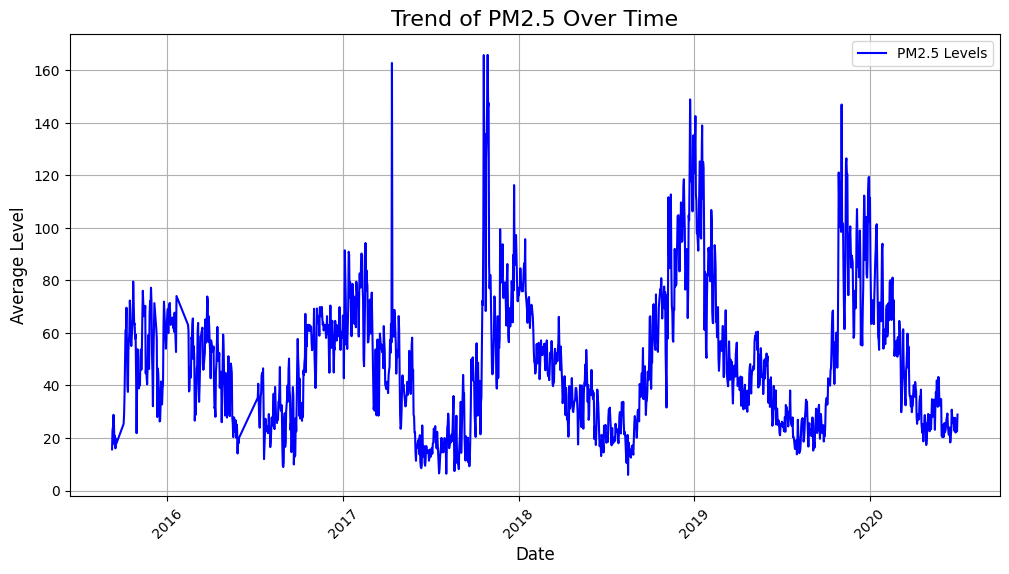

In [62]:
def plot_line_pollutant_trend(df, pollutant):
    plt.figure(figsize=(12, 6))
    pollutant_df = df[df['Pollutant'] == pollutant].groupby('Date')['Value'].mean().reset_index()
    plt.plot(pollutant_df['Date'], pollutant_df['Value'], color='blue', label=f'{pollutant} Levels')
    plt.title(f"Trend of {pollutant} Over Time", fontsize=16)
    plt.xlabel('Date', fontsize=12)
    plt.ylabel('Average Level', fontsize=12)
    plt.legend()
    plt.grid(True)
    plt.xticks(rotation=45)
    plt.show()

plot_line_pollutant_trend(merged_df, 'PM2.5')


*Answer to research question: This line plot answers the research question by providing a clear visual representation of 'PM2.5' levels across different time points, showing trends that help us understand how air quality has evolved.









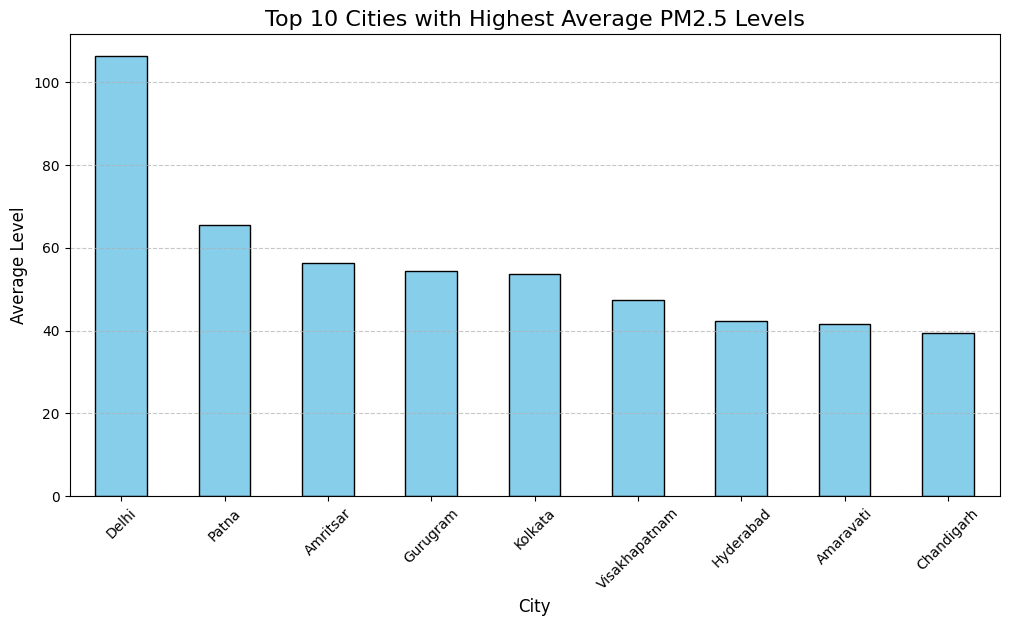

In [63]:
def plot_city_pollutant_levels(df, pollutant):
    plt.figure(figsize=(12, 6))
    city_pollutant = df[df['Pollutant'] == pollutant].groupby('City')['Value'].mean().sort_values(ascending=False).head(10)
    city_pollutant.plot(kind='bar', color='skyblue', edgecolor='black')
    plt.title(f"Top 10 Cities with Highest Average {pollutant} Levels", fontsize=16)
    plt.xlabel('City', fontsize=12)
    plt.ylabel('Average Level', fontsize=12)
    plt.xticks(rotation=45)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()

plot_city_pollutant_levels(merged_df, 'PM2.5')


*Answer to research question: The bar plot provides a clear visualization of which cities experience the highest average levels of 'PM2.5' pollution, answering the research question by showcasing pollution hotspots and guiding potential interventions to improve air quality.








### **5.2:** Reflection
In 2-4 sentences, if you had more time to complete the project, what actions would you take? For example, which data quality and structural issues would you look into further, and what research questions would you further explore?

If I had more time to complete the project, I would explore additional data quality issues, such as handling any remaining missing values, outliers, or duplicates in the dataset. I would also investigate the temporal patterns of pollutant levels across different seasons and years to identify long-term trends or anomalies. Further research questions could include exploring the relationship between specific pollutants and public health data, as well as assessing the impact of government policies or interventions on air quality over time. Additionally, I would consider creating predictive models for air quality forecasting.






